##Loading the dataset
## Link to the dataset:
https://huggingface.co/datasets/cnamuangtoun/resume-job-description-fit

In [2]:
#Loading the dataset from hugging face
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2


In [3]:
#imports
from datasets import load_dataset
import pandas as pd

In [4]:
#loading the dataset
dataset = load_dataset("cnamuangtoun/resume-job-description-fit")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


train.csv:   0%|          | 0.00/53.4M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/15.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6241 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1759 [00:00<?, ? examples/s]

In [5]:
train = dataset['train']
test = dataset['test']

In [6]:
train_data = pd.DataFrame(train)
test_data = pd.DataFrame(test)

In [7]:
train_data.columns

Index(['resume_text', 'job_description_text', 'label'], dtype='object')

In [8]:
train_data.shape

(6241, 3)

In [9]:
train_data.head(5)

,resume_text,job_description_text,label
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit


In [10]:
train_data[train_data['label'] == 'Good Fit']

,resume_text,job_description_text,label
4699,SummaryRecent graduate from Nucamp Coding Boot...,Role: Senior Software Engineer\nType: Full-Tim...,Good Fit
4700,"SummaryHonest, reliable, dependable, hardworki...",\n\nPosition Title: Senior Construction Accoun...,Good Fit
4701,Career OverviewExpert level user interface fro...,Purpose StatementThe Software Engineering Mana...,Good Fit
4702,SummarySenior Software Engineer with 6+ years ...,The position is described below. If you want t...,Good Fit
4703,ProfileHighly motivated Sales Associate with e...,Job Description\nOracle is seeking an experien...,Good Fit
...,...,...,...
6236,SummaryResults-driven Data Entry Clerk with ex...,"Hi,\nHope you are doing great today. Please fi...",Good Fit
6237,Professional SummaryWith the attitude of learn...,Job Title: DHT - Front End Software Engineer W...,Good Fit
6238,Summary• \nOver\nThree years of extensi...,LHH Recruitment Solutions is looking for a Sof...,Good Fit
6239,ProfileAbility to prioritize and multi-task in...,Our client is a growing Medical Device company...,Good Fit


#Preprocessing Data

 When using semantic embeddings, especially with modern pre-trained models like BERT, RoBERTa, or Sentence Transformers, you typically do not need to perform traditional preprocessing steps like:

Removing stop words

Lemmatization or stemming

Lowercasing (often optional, and some models are case-sensitive)

Removing punctuation (again, model-dependent)

Why?
Semantic embedding models are contextual — they’re trained to understand language structure, grammar, and meaning in context, so removing stop words or lemmatizing might actually harm performance because it removes information the model uses for understanding.

Minimal preprocessing you may still consider:
Stripping extra whitespace

Correcting obvious typos (optional, based on use-case)

Truncating very long inputs (since models have max token limits)

In [13]:
train_data['resume_text'][0]

"SummaryHighly motivated Sales Associate with extensive customer service and sales experience. Outgoing sales professional with track record of driving increased sales, improving buying experience and elevating company profile with target market.\nHighlights-Soft Skills: Public Speaking, Public Relations, Team Building, Project Management, Procedure writing, Staff Supervision and Management, Ability to interface with professionals on all levels. Accomplishments, Honors, and Activities -Board of Directors Member for the Food Bank of Corpus Christi from November 2010 to April 2013. -Held Life Insurance License -Basketball Official (Referee) High School Varsity Level.\nExperienceAccountant,08/2014-05/2015Aspirus–Owen,WI,Perform daily and routine accounting functions for two main companies and five small royalty companies. Responsibilities include but are not limited to the following: Accounts Payable, Accounts Receivable, Manage and reconcile funds for multiple banks accounts, Payroll, Pe

Around 800 words

In [14]:
!pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 7.0 MB/s eta 0:00:00


#Without batching

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Precision: 0.4876
Recall:    0.5105
F1 Score:  0.4556


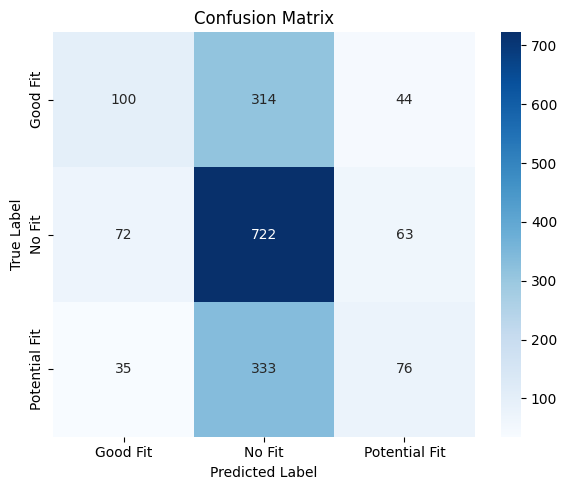

'train_data[\'semantic_similarity\'] = compute_semantic_similarity(train_data[\'resume_text\'], train_data[\'job_description_text\'])\ntest_data[\'semantic_similarity\'] = compute_semantic_similarity(test_data[\'resume_text\'], test_data[\'job_description_text\'])\n\n# 5. Method 2: Probabilistic Model (Naive Bayes) + Logistic Regression\n# Vectorize the concatenation of resume + JD for feature extraction\nvectorizer = TfidfVectorizer(max_features=5000)\n\ntrain_concat = (train_data[\'resume_text\'] + " " + train_data[\'job_description_text\']).tolist()\ntest_concat = (test_data[\'resume_text\'] + " " + test_data[\'job_description_text\']).tolist()\n\nX_train = vectorizer.fit_transform(train_concat)\nX_test = vectorizer.transform(test_concat)\n\n# Encode labels\nlabel_encoder = LabelEncoder()\ny_train = label_encoder.fit_transform(train_data[\'label\'])\ny_test = label_encoder.transform(test_data[\'label\'])\n\n# Train Naive Bayes\nnb_model = MultinomialNB()\nnb_model.fit(X_train, y_tra

In [15]:
# 1. Imports
import numpy as np
import pandas as pd
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Dataset Columns: ['resume_text', 'job_description_text', 'label'] where label indicates fit.

# 3. Preprocessing
def preprocess_text(text):
    # Basic cleaning: Lowercase and strip extra spaces
    return text.lower().strip()

train_data['resume_text'] = train_data['resume_text'].apply(preprocess_text)
train_data['job_description_text'] = train_data['job_description_text'].apply(preprocess_text)
test_data['resume_text'] = test_data['resume_text'].apply(preprocess_text)
test_data['job_description_text'] = test_data['job_description_text'].apply(preprocess_text)

# 4. Method 1: Semantic Similarity-Based Ranking using Sentence-BERT
embedder = SentenceTransformer('all-MiniLM-L6-v2')

#Making the data suitable for training a machine learning model,

def compute_dual_embeddings(resumes, job_descriptions):
    resume_embeds = embedder.encode(resumes, convert_to_tensor=False)
    jd_embeds = embedder.encode(job_descriptions, convert_to_tensor=False)
    return np.hstack((resume_embeds, jd_embeds))  # Shape: (N, 2 * dim)

# 6. Prepare data
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label'])
y_test = label_encoder.transform(test_data['label'])

X_train = compute_dual_embeddings(train_data['resume_text'], train_data['job_description_text'])
X_test = compute_dual_embeddings(test_data['resume_text'], test_data['job_description_text'])

# 7. Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# 8. Evaluate
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


'''train_data['semantic_similarity'] = compute_semantic_similarity(train_data['resume_text'], train_data['job_description_text'])
test_data['semantic_similarity'] = compute_semantic_similarity(test_data['resume_text'], test_data['job_description_text'])

# 5. Method 2: Probabilistic Model (Naive Bayes) + Logistic Regression
# Vectorize the concatenation of resume + JD for feature extraction
vectorizer = TfidfVectorizer(max_features=5000)

train_concat = (train_data['resume_text'] + " " + train_data['job_description_text']).tolist()
test_concat = (test_data['resume_text'] + " " + test_data['job_description_text']).tolist()

X_train = vectorizer.fit_transform(train_concat)
X_test = vectorizer.transform(test_concat)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label'])
y_test = label_encoder.transform(test_data['label'])

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_probs = nb_model.predict_proba(X_test)[:, 1]  # Probability of being a fit

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# 6. Dual Screening Process
# Rank candidates based on semantic similarity (higher is better)
test_data['semantic_rank'] = test_data['semantic_similarity'].rank(ascending=False)

# Rank candidates based on Naive Bayes probabilities
test_data['nb_rank'] = pd.Series(nb_probs).rank(ascending=False)

# Rank candidates based on Logistic Regression probabilities
test_data['lr_rank'] = pd.Series(lr_probs).rank(ascending=False)

# Take the intersection/union (example: top 30% candidates from both)
top_k = int(0.3 * len(test_data))  # top 30%

semantic_top = set(test_data.nlargest(top_k, 'semantic_rank').index)
nb_top = set(test_data.nlargest(top_k, 'nb_rank').index)
lr_top = set(test_data.nlargest(top_k, 'lr_rank').index)

# Intersection of semantic + Naive Bayes
intersection_nb = semantic_top.intersection(nb_top)
# Intersection of semantic + Logistic Regression
intersection_lr = semantic_top.intersection(lr_top)
# Union of both intersections
final_candidates = intersection_nb.union(intersection_lr)

# 7. Evaluation on final candidates
final_preds = y_test[list(final_candidates)]
final_true = test_data.iloc[list(final_candidates)]['label'].map({'Fit': 1, 'No Fit': 0})

precision = precision_score(final_true, final_preds)
recall = recall_score(final_true, final_preds)
f1 = f1_score(final_true, final_preds)

print(f"Dual Screening Evaluation - Precision: {precision}, Recall: {recall}, F1: {f1}")'''


##Pretty bad results,,

**Suggestions from Chatgpt:**
| Approach | Action |
|---------|--------|
| 🔄 **Balance the dataset** | Try upsampling/downsampling to fix label imbalance |
| 🔁 **Chunk long inputs** | Split resumes/JDs into segments, embed, then average |
| 🔍 **Add handcrafted features** | Add `length`, `keyword match count`, `TF-IDF cosine score`, etc. |
| 🤖 **Use better classifiers** | Try `RandomForest`, `XGBoost`, or `SVM` |
| 🔧 **Threshold tuning** | Adjust decision thresholds for better precision/recall tradeoff |
| 🧠 **Fine-tune embeddings** | Fine-tune Sentence-BERT on your own dataset (advanced but effective) |



In [16]:
# 10. Predict on Custom Resume + Job Description
def predict_fit(resume_text, job_description_text):
    resume_text = preprocess_text(resume_text)
    job_description_text = preprocess_text(job_description_text)
    embedding = compute_dual_embeddings([resume_text], [job_description_text])
    prediction = clf.predict(embedding)
    return label_encoder.inverse_transform(prediction)[0]

# Example usage
custom_resume = """Experienced software engineer with expertise in Python, Django, and REST API development. Worked on building scalable backend systems for e-commerce applications."""
custom_jd = """Looking for a backend developer skilled in Python and RESTful API design, preferably with Django experience."""

predicted_label = predict_fit(custom_resume, custom_jd)
print(f"Predicted Fit Category: {predicted_label}")

Predicted Fit Category: Potential Fit


##Step 2:

##Semantic Similarity score

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_similarity_scores(resume_embed, jd_embed):
    similarities = cosine_similarity(resume_embed, jd_embed)
    return np.diag(similarities)  # each resume vs its own JD

resume_embeds = X_test[:, :384]
jd_embeds = X_test[:, 384:]


similarity_scores = compute_similarity_scores(resume_embeds, jd_embeds)


threshold = 0.6  # Adjust based on your performance tuning

ml_predictions = clf.predict(X_test)
ml_labels = label_encoder.inverse_transform(ml_predictions)

intersection_indices = [
    i for i, (label, score) in enumerate(zip(ml_labels, similarity_scores))
    if label == 'Good Fit' and score >= threshold
]

# Optional: View or extract filtered results
filtered_results = test_data.iloc[intersection_indices]

# View intersected resume rows from the test set
intersected_resumes = test_data.iloc[intersection_indices][['resume_text', 'job_description_text']]
intersected_resumes.reset_index(drop=True, inplace=True)
print(intersected_resumes.head())








                                         resume_text  \
0  summaryfinancial accountant specializing in fi...   
1  summaryfinancial accountant specializing in fi...   
2  summarycapable fund accountant successful at m...   
3  professional summaryi have a proven ability to...   
4  summaryfinancial accountant specializing in fi...   

                                job_description_text  
0  corporate senior staff accountant (remote) pos...  
1  want to learn more about this role and jobot? ...  
2  corporate senior staff accountant (remote) pos...  
3  backed by a leading growth equity firm, an la ...  
4  a leading insurance services company in irvine...  


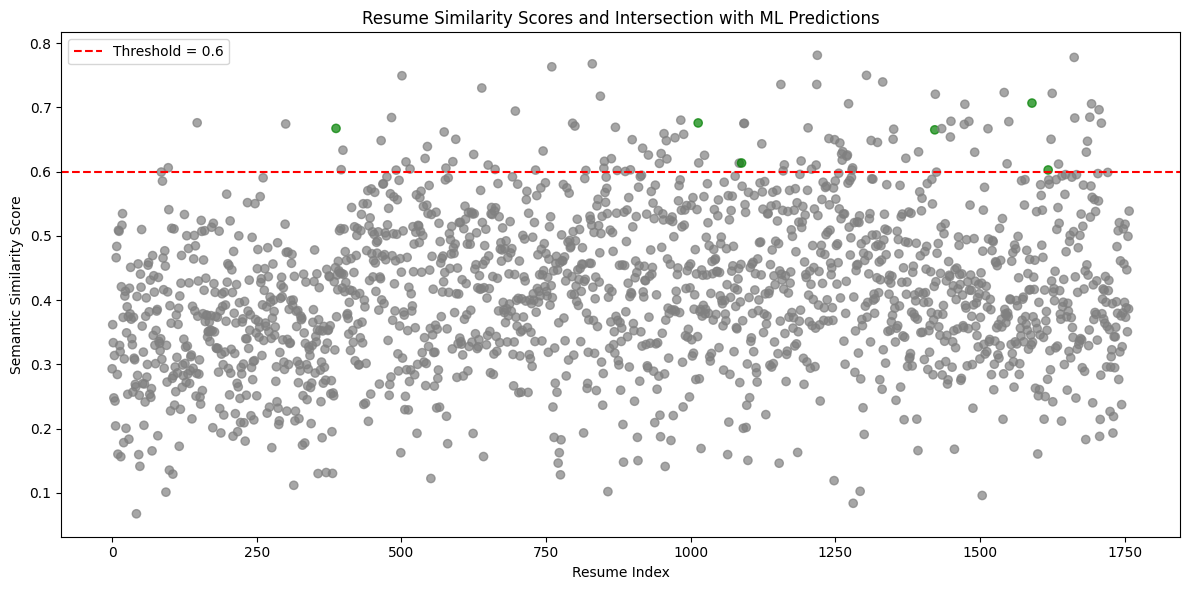

In [20]:
# Prepare color: green for intersection, gray otherwise
colors = ['green' if i in intersection_indices else 'gray' for i in range(len(similarity_scores))]

plt.figure(figsize=(12, 6))
plt.scatter(range(len(similarity_scores)), similarity_scores, c=colors, alpha=0.7)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Resume Index')
plt.ylabel('Semantic Similarity Score')
plt.title('Resume Similarity Scores and Intersection with ML Predictions')
plt.legend()
plt.tight_layout()
plt.show()
